In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

from helpers import *
np.set_printoptions(suppress=True)

In [2]:
data = pd.read_csv("netflix.csv")
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429
...,...,...,...,...,...,...,...
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973


In [3]:
data = pd.read_csv("netflix.csv")
data.set_index("Date",inplace=True)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4881 entries, 2002-05-23 to 2021-10-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       4881 non-null   float64
 1   Low        4881 non-null   float64
 2   Open       4881 non-null   float64
 3   Close      4881 non-null   float64
 4   Volume     4881 non-null   float64
 5   Adj Close  4881 non-null   float64
dtypes: float64(6)
memory usage: 266.9+ KB


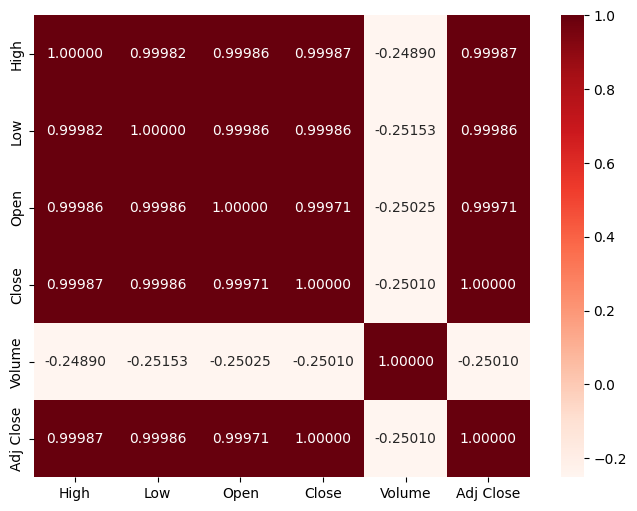

In [5]:
plotHeatMap(data.corr())

In [6]:
data[["Open","Volume","Close"]].head()

,Open,Volume,Close
Date,,,
2002-05-23,1.156429,104790000.0,1.196429
2002-05-24,1.214286,11104800.0,1.210000
2002-05-28,1.213571,6609400.0,1.157143
2002-05-29,1.164286,6757800.0,1.103571
2002-05-30,1.107857,10154200.0,1.071429


In [7]:
dataX = data[["Open","Volume"]].values
dataY = data["Close"].values

In [8]:
st = StandardScaler()
dataX_scaled = st.fit_transform(dataX)

In [9]:
tempScaled = createTempDataFrame(dataX_scaled,columns=["Scaled X values"],index=data.index)
tempOriginal = createTempDataFrame(data[["Open","Volume"]].values,columns=["Original X values"],index=data.index)
pd.concat([tempScaled,tempOriginal],axis=1).head()

,Scaled X values,Original X values
Date,,
2002-05-23,[-0.66393656 4.54356747],[1.15642905e+00 1.04790000e+08]
2002-05-24,[-0.66356802 -0.29405696],[ 1.21428597 11104800. ]
2002-05-28,[-0.66357258 -0.52618601],[ 1.21357095 6609400. ]
2002-05-29,[-0.66388651 -0.51852308],[ 1.16428602 6757800. ]
2002-05-30,[-0.66424596 -0.34314311],[ 1.10785699 10154200. ]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(dataX_scaled,dataY,train_size=0.7,shuffle=False)
len(X_train),len(X_test)

(3416, 1465)

In [11]:
linearModel = LinearRegression()
linearModel.fit(X_train,y_train)
linearPredicts=linearModel.predict(X_test)

In [12]:
svrLinearModel = SVR(kernel="linear")
svrLinearModel.fit(X_train,y_train)
svrLinearPredicts=svrLinearModel.predict(X_test)

In [13]:
treeModel = DecisionTreeRegressor()
treeModel.fit(X_train,y_train)
treePredicts=treeModel.predict(X_test)

In [14]:
knnModel = KNeighborsRegressor(n_neighbors=5)
knnModel.fit(X_train,y_train)
knnPredicts=knnModel.predict(X_test)

In [15]:
poly2Features = PolynomialFeatures(degree=2)
poly2Train = poly2Features.fit_transform(X_train)
poly2Test = poly2Features.transform(X_test)

poly2Model = LinearRegression()
poly2Model.fit(poly2Train,y_train)
poly2Predicts=poly2Model.predict(poly2Test)

In [16]:
poly3Features = PolynomialFeatures(degree=3)
poly3Train = poly3Features.fit_transform(X_train)
poly3Test = poly3Features.transform(X_test)

poly3Model = LinearRegression()
poly3Model.fit(poly3Train,y_train)
poly3Predicts=poly3Model.predict(poly3Test)

In [17]:
from tensorflow.keras import Model,layers,models,callbacks
import tensorflow as tf

In [18]:
kerasModel = models.Sequential([
    layers.Dense(input_shape=X_test.shape[1:],units=16,activation="linear"),
    layers.Dense(1)
])
kerasModel.compile(optimizer="adam",loss=tf.keras.losses.mean_squared_error,metrics=["mse"])

In [19]:
history=kerasModel.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),
                      callbacks= [callbacks.EarlyStopping(patience=7)])

Epoch 1/100
107/107 [==============================] - 2s 6ms/step - loss: 1056.4652 - mse: 1056.4652 - val_loss: 116634.7109 - val_mse: 116634.7109
Epoch 2/100
107/107 [==============================] - 1s 6ms/step - loss: 1002.8365 - mse: 1002.8365 - val_loss: 117298.8047 - val_mse: 117298.8047
Epoch 3/100
107/107 [==============================] - 1s 6ms/step - loss: 934.9926 - mse: 934.9926 - val_loss: 118030.9375 - val_mse: 118030.9375
Epoch 4/100
107/107 [==============================] - 1s 12ms/step - loss: 869.4250 - mse: 869.4250 - val_loss: 118540.7266 - val_mse: 118540.7266
Epoch 5/100
107/107 [==============================] - 1s 5ms/step - loss: 820.1710 - mse: 820.1710 - val_loss: 118333.0859 - val_mse: 118333.0859
Epoch 6/100
107/107 [==============================] - 2s 18ms/step - loss: 786.9762 - mse: 786.9762 - val_loss: 117038.5469 - val_mse: 117038.5469
Epoch 7/100
107/107 [==============================] - 1s 5ms/step - loss: 761.9155 - mse: 761.9155 - val_loss: 

<AxesSubplot:>

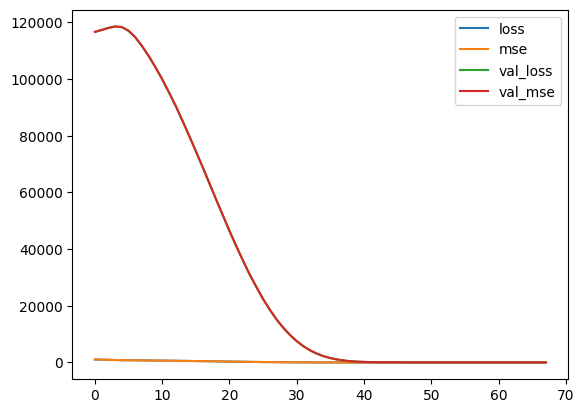

In [20]:
pd.DataFrame(history.history).plot()

In [21]:
artificalPredicteds=kerasModel.predict(X_test)

46/46 [==============================] - 0s 1ms/step


In [22]:
fraction=3

svrLinearMSEScore = round(mean_squared_error(y_test,svrLinearPredicts), fraction)
knnMSEScore = round(mean_squared_error(y_test,knnPredicts), fraction)
treeMSEScore = round(mean_squared_error(y_test,treePredicts), fraction)
linearMSEScore = round(mean_squared_error(y_test,linearPredicts), fraction)
poly2MSEScore = round(mean_squared_error(y_test,poly2Predicts), fraction)
poly3MSEScore = round(mean_squared_error(y_test,poly3Predicts), fraction)
artificalMSEScore = round(mean_squared_error(y_test,artificalPredicteds), fraction)


svrLinearR2Score = round(r2_score(y_test,svrLinearPredicts), fraction)
knnR2Score = round(r2_score(y_test,knnPredicts), fraction)
treeR2Score = round(r2_score(y_test,treePredicts), fraction)
linearR2Score = round(r2_score(y_test,linearPredicts), fraction)
poly2R2Score = round(r2_score(y_test,poly2Predicts), fraction)
poly3R2Score = round(r2_score(y_test,poly3Predicts), fraction)
artificalR2Score = round(r2_score(y_test,artificalPredicteds), fraction)

In [23]:
items = [
    ItemRegression(svrLinearPredicts, svrLinearR2Score, svrLinearMSEScore, label="SVR Linear",
                   title="SVR Linear Model test dataset predict result"),
    
    ItemRegression(knnPredicts, knnR2Score, knnMSEScore, label="KNN",
                   title="KNN Regressor Model test dataset predict result"),
    
    ItemRegression(treePredicts, treeR2Score, treeMSEScore, label="Decision Tree",
                   title="Decision Tree Regressor Model test dataset predict result"),
    
    ItemRegression(linearPredicts, linearR2Score, linearMSEScore, label="Linear",
                   title="Linear Model test dataset predict result"),
    
    ItemRegression(poly2Predicts, poly2R2Score, poly2MSEScore, label="Poly2",
                   title="Polynomial 2 degree linear model test dataset predict result"),
    
    ItemRegression(poly3Predicts, poly3R2Score, poly3MSEScore, label="Poly3",
                   title="Polynomial 3 degree linear model test dataset predict result"),
    
    ItemRegression(artificalPredicteds, artificalR2Score, artificalMSEScore, label="Artifical",
                   title="Artifical model test dataset predict result")
]

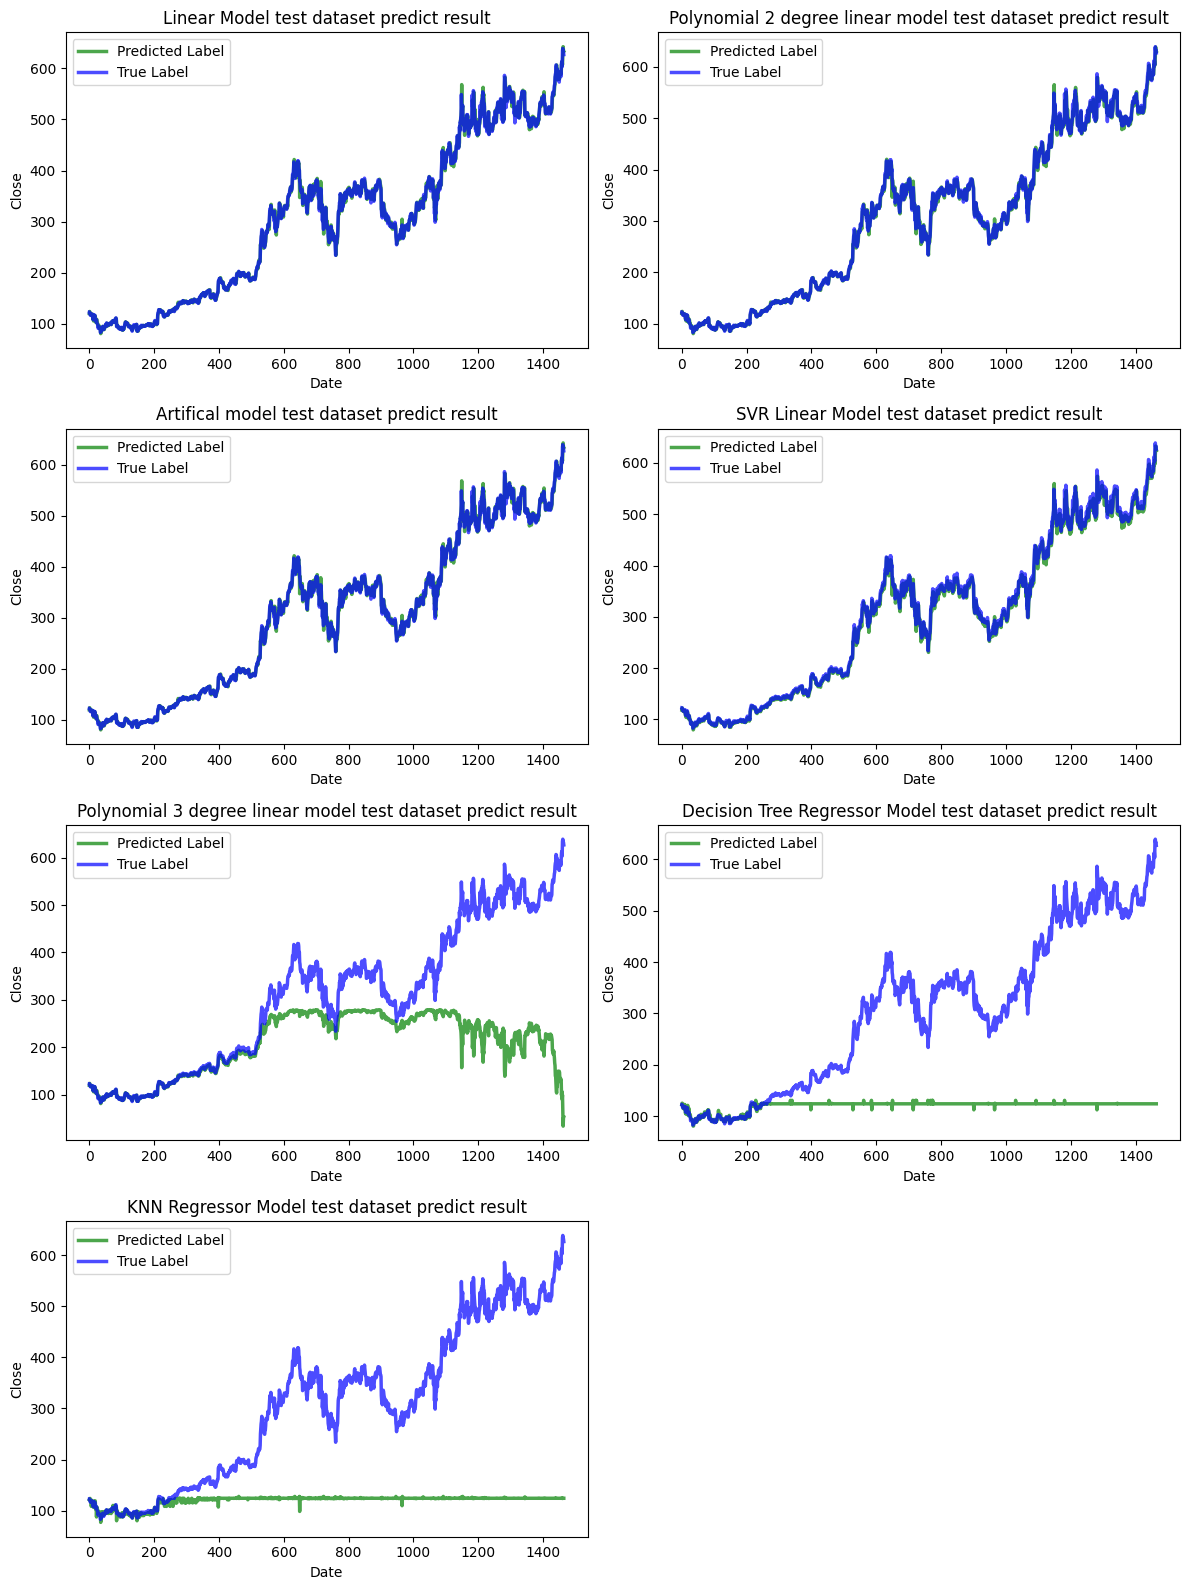

In [24]:
plotTrueAndPredicts(items,y_test)

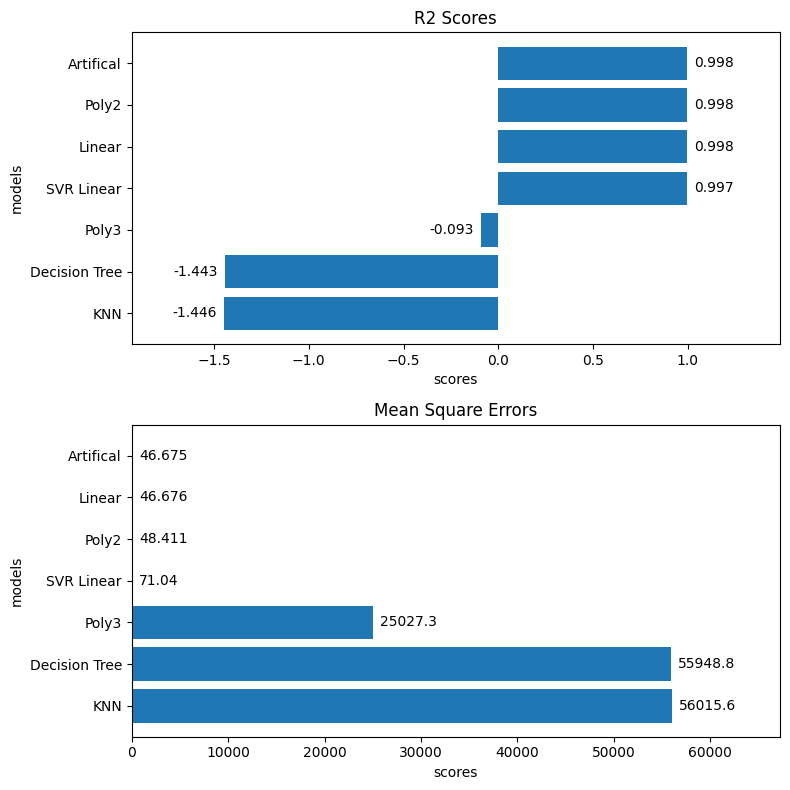

In [25]:
plotRegressionScoreBars(items)

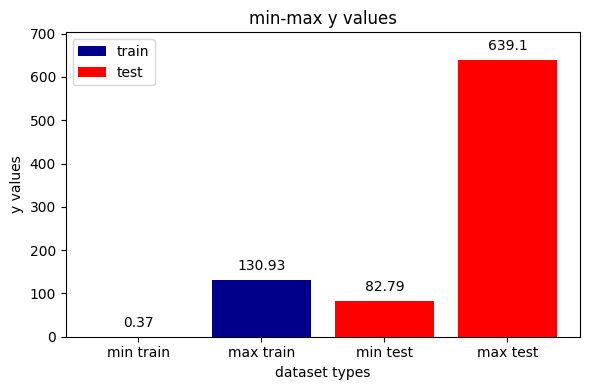

In [26]:
### why svr,knn and tree models are bad to predict higher values

fraction = 2
minTrain = round(min(y_train), fraction)
maxTrain = round(max(y_train), fraction)

minTest = round(min(y_test), fraction)
maxTest = round(max(y_test), fraction)

plt.figure(figsize=(6,4),tight_layout =True)
bTrain=plt.bar(["min train","max train"],[minTrain,maxTrain],
         color="darkblue",label="train")
plt.bar_label(bTrain,padding=5)

bTest=plt.bar(["min test","max test"],[minTest,maxTest],
         color="r",label="test")
plt.bar_label(bTest,padding=5)

plt.xlabel("dataset types")
plt.ylabel("y values")
plt.title("min-max y values")
plt.margins(y=0.1)
plt.legend()